Výsledná hodnota investice s průběžným placením úroků je 1 644 305.67 Kč.
Výsledná hodnota investice s předplacením úroků dopředu je 1 659 714.96 Kč.

Ve finále je o 15 409.29 Kč výhodnější předplatit úroky dopředu.
Rozdíl v budoucích hodnotách investicí přepočítaný na dnešní hodnotu je 7 667.6 Kč.


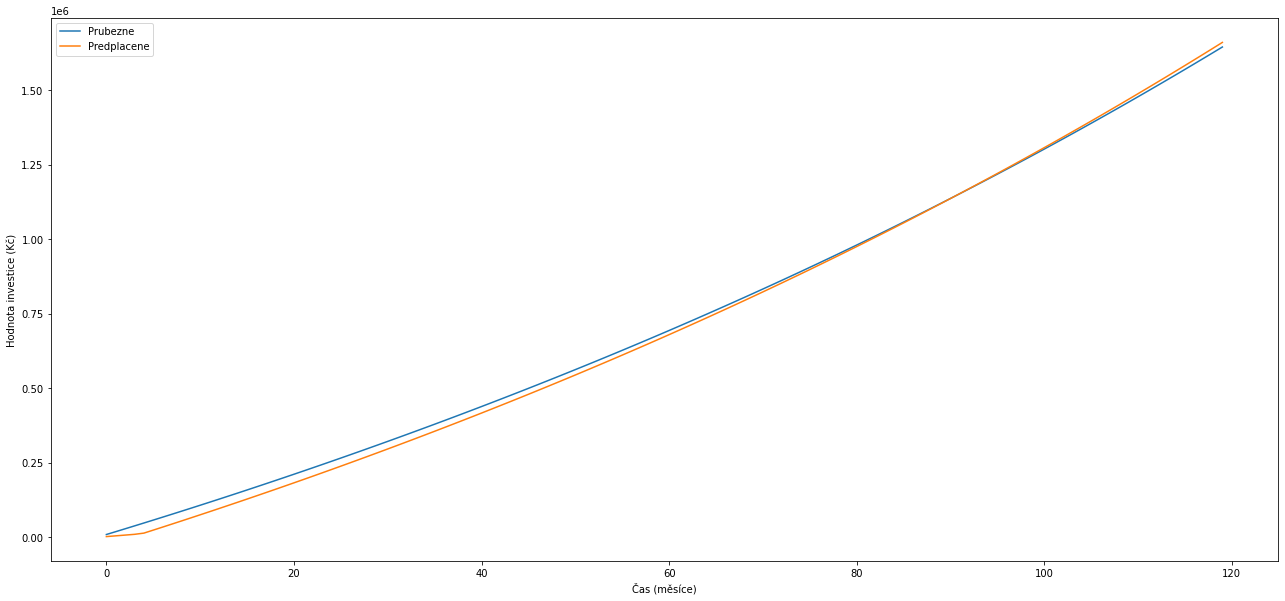

In [152]:
import matplotlib.pyplot as plt

# Definujte parametry investice
Doba = 120          # Doba investice v měsících
Castka = 10000       # Měsíční investovaná částka v kč

Urok1 = 5           # Poplatky pro průběžné placení v procentech 
Urok2 = 3           # Poplatky pro předplacení dopředu v procentech 

ProcentaPrvniVklady = 75   # Kolik procent z investované částky se ztrhává ke splacení poplatků ve variantě předplacení poplatků dopředu

Zhodnoceni = 7      # Průměrné roční zhodnocení investice

# Definice proměnných
Mesice = []
Vyvoj1 = []
Vyvoj2 = []
PredplacenePoplatky = []

# Celkove zaplacene poplatky
ZaplaceneUroky1 = Urok1/100*Doba*Castka
ZaplaceneUroky2 = Urok2/100*Doba*Castka

# Vypocet promenných pro první měsíc
Mesice.append(0)
Vyvoj1.append(Castka*(1-Urok1/100))
Vyvoj2.append(Castka*(1-ProcentaPrvniVklady/100))
PredplacenePoplatky.append(Castka*(ProcentaPrvniVklady/100))

# Vypocet vyvoje investice
for i in range(Doba-1):
    Mesice.append(i+1)
    Vyvoj1.append(Vyvoj1[i]*(1+Zhodnoceni/12/100)+Castka*(1-Urok1/100))
    if PredplacenePoplatky[i] < (ZaplaceneUroky2-Castka*(ProcentaPrvniVklady/100)):
        Vyvoj2.append(Vyvoj2[i]*(1+Zhodnoceni/12/100)+Castka*(1-ProcentaPrvniVklady/100))
        PredplacenePoplatky.append(PredplacenePoplatky[i]+Castka*(ProcentaPrvniVklady/100))
    else:
        if PredplacenePoplatky[i] != ZaplaceneUroky2:
            Vyvoj2.append(Vyvoj2[i]*(1+Zhodnoceni/12/100)+Castka-(ZaplaceneUroky2-PredplacenePoplatky[i]))
            PredplacenePoplatky.append(PredplacenePoplatky[i]+(ZaplaceneUroky2-PredplacenePoplatky[i]))
        else:
            Vyvoj2.append(Vyvoj2[i]*(1+Zhodnoceni/12/100)+Castka)
            PredplacenePoplatky.append(PredplacenePoplatky[i])

# Přepočet budoucího rozdílu mezi investicemi na dnešní hodnotu
HodnotaRozdiluDnes = []
HodnotaRozdiluDnes.append(abs(Vyvoj1[-1]-Vyvoj2[-1]))
for i in range(Doba):
    HodnotaRozdiluDnes.append(HodnotaRozdiluDnes[i]/(1+Zhodnoceni/12/100))
    
# Výsledky
print("Výsledná hodnota investice s průběžným placením úroků je "+str(f"{round(Vyvoj1[-1],2):,}".replace(',', ' '))+" Kč.")
print("Výsledná hodnota investice s předplacením úroků dopředu je "+str(f"{round(Vyvoj2[-1],2):,}".replace(',', ' '))+" Kč.\n")

if Vyvoj1[-1]>Vyvoj2[-1]:
    print("Ve finále je o "+'\033[1m'+str(f"{round(Vyvoj1[-1]-Vyvoj2[-1],2):,}".replace(',', ' '))+" Kč výhodnější platit úroky průběžně."+ '\033[0m')
elif Vyvoj1[-1]==Vyvoj2[-1]:
    print("Obe možnosti jsou stejné.")
elif Vyvoj1[-1]<Vyvoj2[-1]:
    print("Ve finále je o "+'\033[1m'+str(f"{round(Vyvoj2[-1]-Vyvoj1[-1],2):,}".replace(',', ' '))+" Kč výhodnější předplatit úroky dopředu."+ '\033[0m')

print("Rozdíl v budoucích hodnotách investicí přepočítaný na dnešní hodnotu je "+str(f"{round(HodnotaRozdiluDnes[-1],2):,}".replace(',', ' '))+" Kč.")

# Vykreslit vývoj investice
f = plt.figure()
f.set_figwidth(22)
f.set_figheight(10)
plt.plot(Mesice, Vyvoj1, label='Prubezne')
plt.plot(Mesice, Vyvoj2, label='Predplacene')
plt.legend()
plt.xlabel("Čas (měsíce)")
plt.ylabel("Hodnota investice (Kč)")
plt.show()

